# Multi Class Image Classifier

Let's train an image classifier that can distinguish between multiple breeds of dog

In [2]:
# Import those pesky dependencies
from fastai.vision.all import *
import timm

In [3]:
# Get our pets dataset
path = untar_data(URLs.PETS)/'images'

In [4]:
# Set up our DataLoaders
dls = ImageDataLoaders.from_name_func('.',
                                     get_image_files(path),
                                     valid_pct=0.2,
                                     seed=69,
                                     label_func=RegexLabeller(pat=r'^([^/]+)_\d+'),
                                     item_tfms=Resize(224))

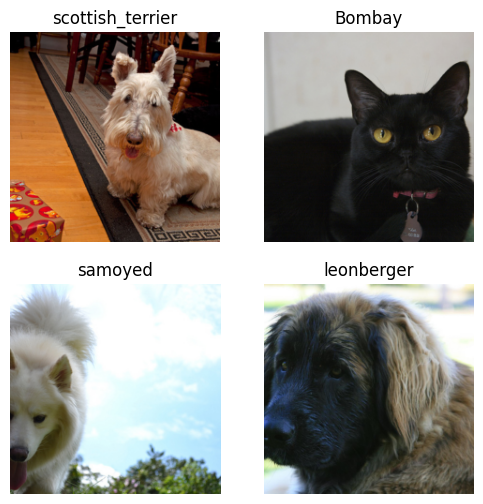

In [6]:
# Let's take a quick sample of our batch
dls.show_batch(max_n=4)

In [22]:
# OK! Now we can train our model using resnet34 to speed up the process
# RECAP: RESNETs are pre-trained CNN models
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.443070,0.331090,0.100812,00:39


epoch,train_loss,valid_loss,error_rate,time
0,0.423552,0.271337,0.089986,00:50
1,0.335265,0.298887,0.083221,00:49
2,0.190833,0.253538,0.064953,00:48
3,0.090749,0.233503,0.069012,00:48
4,0.049222,0.228037,0.065629,00:48


In [7]:
# The error rate looks decent, but we can improve on this even more
# see: specialized image models provided by PyTorch -- 'timm'
timm.list_models('convnext_tiny*')

['convnext_tiny',
 'convnext_tiny_384_in22ft1k',
 'convnext_tiny_hnf',
 'convnext_tiny_in22ft1k',
 'convnext_tiny_in22k']

In [8]:
# Let's see if one of these models perform better!
# We're casting our data to half-precision floating point
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16()
learn.fine_tune(3)

Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_tiny_22k_224.pth" to /home/marthinus/.cache/torch/hub/checkpoints/convnext_tiny_22k_224.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.115082,0.234952,0.079838,02:21


epoch,train_loss,valid_loss,error_rate,time
0,0.259977,0.179817,0.056834,02:49
1,0.215433,0.169340,0.047361,02:50
2,0.138670,0.152776,0.046008,02:51
3,0.087030,0.143848,0.047361,02:53
4,0.069138,0.142880,0.046008,02:56


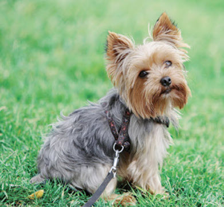

In [9]:
# The new model takes three times longer per Epoch, but appears to be 30% more accurate
# Let's grab an image of a dog 
im = PILImage.create('data/dog.jpg')
im.thumbnail((224,224))
im

In [11]:
# Here's the moment of truth.
learn.predict(im)

('yorkshire_terrier',
 TensorBase(36),
 TensorBase([7.3924e-10, 1.1361e-09, 8.6595e-10, 4.3855e-08, 1.9591e-09,
             4.7180e-09, 1.3831e-08, 1.1365e-08, 1.2356e-09, 4.1191e-09,
             6.1026e-09, 8.0401e-10, 4.1779e-09, 4.1278e-08, 5.8260e-09,
             3.5376e-08, 4.4488e-10, 5.1934e-07, 3.2331e-09, 1.8350e-09,
             6.0100e-10, 4.9244e-10, 2.3181e-07, 3.5544e-09, 1.0516e-08,
             4.5277e-10, 9.5507e-08, 2.6466e-09, 3.1254e-07, 7.6219e-08,
             8.5253e-10, 8.4946e-08, 2.9023e-06, 8.8543e-09, 1.8470e-08,
             3.9697e-08, 1.0000e+00]))

In [12]:
# Our prediction also pulled in the probabilities linked to other categories of breeds
# At the moment all we see is a list of numbers without any labels, let's change that.
categories = learn.dls.vocab

# Here we create a dictionary where our prediction probabilities have category labels
def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [14]:
# Now we can see the probabilties our model attached to other classes of images
# 1 is the ground truth and our model is at 0.99999 certainty, very good!
classify_image(im)

{'Abyssinian': 7.392425005470216e-10,
 'Bengal': 1.1360511420477337e-09,
 'Birman': 8.659517547471296e-10,
 'Bombay': 4.385455554256623e-08,
 'British_Shorthair': 1.9590902233801444e-09,
 'Egyptian_Mau': 4.718006874071534e-09,
 'Maine_Coon': 1.3831490619509168e-08,
 'Persian': 1.1365155039300134e-08,
 'Ragdoll': 1.235582636205379e-09,
 'Russian_Blue': 4.119139251912429e-09,
 'Siamese': 6.102574001687344e-09,
 'Sphynx': 8.040089705119158e-10,
 'american_bulldog': 4.177882040323766e-09,
 'american_pit_bull_terrier': 4.127808495013596e-08,
 'basset_hound': 5.825960602834357e-09,
 'beagle': 3.53760434279593e-08,
 'boxer': 4.4488399075781615e-10,
 'chihuahua': 5.193397782932152e-07,
 'english_cocker_spaniel': 3.23314952588305e-09,
 'english_setter': 1.8350110320142221e-09,
 'german_shorthaired': 6.009999165002e-10,
 'great_pyrenees': 4.924416985296887e-10,
 'havanese': 2.318099063813861e-07,
 'japanese_chin': 3.55438944943387e-09,
 'keeshond': 1.0516023607465286e-08,
 'leonberger': 4.527733